# Use this:<br> conda install pillow
<br> This should fix PIL, I think

In [1]:
import PIL.Image
from numpy import asarray
from PIL import Image
from numpy import fliplr

import plaidml.keras
plaidml.keras.install_backend()

#from tensorflow.keras import backend
# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten
import matplotlib.image as mpimg

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils

from sklearn.model_selection import train_test_split

import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
#import os
#counter = 0
#d = "C:/Users/Alan/Desktop/Data_Science_2/final_project/train"
#for path in os.listdir(d):
    #full_path = os.path.join(d, path)
    #if os.path.isfile(full_path):
        #print(full_path)
        #img = Image.open(full_path)
        #maxsize = (32, 32)
        #img = img.resize(maxsize, PIL.Image.ANTIALIAS)
        #img.save('resized_photos/'+ str(counter) + '.jpg')
        #counter += 1

In [4]:
listForX = []
listForFlipX = []
for x in range(0, 10222):
    test = mpimg.imread("/Users/Alan/Desktop/Data_Science_2/final_project/resized_photos/"+str(x)+".jpg")
    testing = (test.reshape(1, 3072))
    testFlip = fliplr(test)
    testingFlip = (testFlip.reshape(1, 3072))
    listForFlipX.append(testingFlip[0])
    listForX.append(testing[0])

In [5]:
listForFlipX[0]

array([207, 158,  91, ..., 183, 127,  94], dtype=uint8)

In [6]:
listForX[0]

array([151, 141,  69, ..., 169, 105,  80], dtype=uint8)

In [7]:
X = np.concatenate((listForX, listForFlipX), axis=0)

In [8]:
#hello.shape

In [9]:
#df = pd.DataFrame(listForX)

In [10]:
#df.values.tolist()

In [11]:
#X = np.asarray(listForX).concat(np.asarray(listForFlipX))

In [12]:
X.shape

(20444, 3072)

In [13]:
y = pd.read_csv("/Users/Alan/Desktop/Data_Science_2/final_project/labels.csv")

In [14]:
#y

In [15]:
y = y.drop(['id'], axis=1)

In [16]:
y['breed'] = pd.factorize(y['breed'])[0]

In [17]:
#y

In [18]:
y = y.breed.tolist() + y.breed.tolist()

In [19]:
len(y)

20444

In [20]:
#yTest = []
#for x in range(0, 1000):
   # yTest.append(y[x])


In [21]:
#y = yTest

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [23]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

In [24]:
y_train = np_utils.to_categorical(y_train, 120)
y_test = np_utils.to_categorical(y_test, 120)

In [25]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [26]:
X_train.shape

(16355, 32, 32, 3)

In [55]:
model = Sequential()

In [56]:
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25)) 
print(model.output_shape) # -> (None, 26, 26, 32)

(None, 15, 15, 16)


In [57]:
# more hidden layers:
model.add(Convolution2D(32, (3, 3), activation='relu'))
# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25)) 


model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.25)) 

(None, 2, 2, 64)


In [58]:
# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))
print(model.output_shape)

(None, 256)
(None, 128)
(None, 120)


In [59]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')

In [60]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          18496     
__________

In [61]:
X_train.shape

(16355, 32, 32, 3)

In [62]:
y_train.shape

(16355, 120)

In [72]:
from keras.callbacks import EarlyStopping

fitted_model = model.fit(X_train, y_train, validation_split=0.1, batch_size=64, epochs=50, shuffle=True, verbose=1)

Train on 14719 samples, validate on 1636 samples
Epoch 1/50
14719/14719 [==============================] - 4s 267us/step - loss: 3.5772 - acc: 0.1455 - val_loss: 3.7758 - val_acc: 0.1222
Epoch 2/50
14719/14719 [==============================] - 4s 262us/step - loss: 3.5772 - acc: 0.1467 - val_loss: 3.7607 - val_acc: 0.1278
Epoch 3/50
14719/14719 [==============================] - 4s 264us/step - loss: 3.5819 - acc: 0.1385 - val_loss: 3.7538 - val_acc: 0.1241
Epoch 4/50
14719/14719 [==============================] - 4s 260us/step - loss: 3.5693 - acc: 0.1476 - val_loss: 3.7358 - val_acc: 0.1296
Epoch 5/50
14719/14719 [==============================] - 4s 258us/step - loss: 3.5776 - acc: 0.1466 - val_loss: 3.7520 - val_acc: 0.1247
Epoch 6/50
14719/14719 [==============================] - 4s 257us/step - loss: 3.5538 - acc: 0.1473 - val_loss: 3.7314 - val_acc: 0.1357
Epoch 7/50
14719/14719 [==============================] - 4s 260us/step - loss: 3.5519 - acc: 0.1497 - val_loss: 3.7432 - v

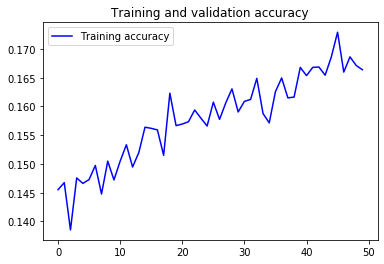

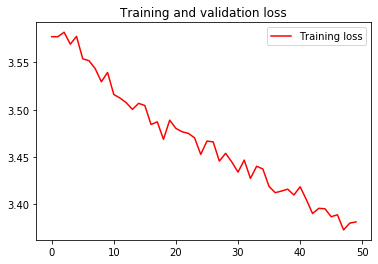

In [73]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = fitted_model.history['acc']
#val_accuracy = history.history['val_acc']
loss = fitted_model.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

In [74]:
y_pridict = model.predict(X_test, verbose=1)
print (y_pridict.shape)

4089/4089 [==============================] - 0s 91us/step
(4089, 120)


In [75]:
#y_pridict

In [76]:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

4089/4089 [==============================] - 1s 151us/step
The accuracy is:  0.1288823673269748
